In [54]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
%matplotlib inline
%matplotlib widget

In [ ]:
class eoq:
    def __init__(self, K:float, h:float, d:float,v:float):
        self.K,self.h,self.d,self.v = K,h,d,v
    def cost(self,Q:float) -> float:
        return self.fixed_ordering_cost(Q) + self.variable_ordering_cost(Q) + self.holding_cost(Q)
    def relevant_cost(self,Q:float) -> float:
        return self.fixed_ordering_cost(Q) + self.holding_cost(Q)
    def fixed_ordering_cost(self,Q:float) -> float:
        K,d = self.K, self.d
        return K/(Q/d)
    def variable_ordering_cost(self,Q:float) -> float:
        d,v = self.d, self.v
        return d+v
    def holding_cost(self,Q:float) -> float:
        h = self.h
        return h + Q/2
    def compute_eoq(self) -> float:
        x0 = 1
        res = minimize(self.relevant_cost,x0,method='nelder-mead',
                       options = {'xtol': 1e-8,'disp':False})
        return res.x[0]

pb = eoq(100,1,10,2)
Qopt = pb.compute_eoq()
print("EOQ:", Qopt)
print("Relevant Cost:", pb.relevant_cost(Qopt))

In [ ]:
#Constant demand
d = 120000 #annual demand
S = 500 #ordering cost
h = 0.3 #holding cost
selling_price = 5
unit_cost = 1
optimal_quantity = math.sqrt((2*d*S)/h)
cycle_time = math.sqrt((2*S)/(h*d))
order_cycle = cycle_time *360 #Assuming total of 360 working days in a year
review_period_eoq = round(order_cycle,2)

In [ ]:
def daily_demand(mean, sd, probability):
    random_num = np.random.uniform(0, 1)              #chose a random number between 1 and 0
    if random_num > probability:                      #if number is more than probability then there is no sale
        return 0
    else:
        return np.random.normal(mean, sd)
    #demand follows a log-normal distribution using mean and sd of the previous year's demand.

In [ ]:
def eoq_monte_carlo(M,review_period,probability,mean,sd):
    
    stock_out = 0
    inventory = M
    
    # dictionary to store all the information
    data = {'inv_level': [], 'daily_demand': [], 'units_sold': [], 'units_lost': [], 'orders': []}

    for day in range(1, 360):
        day_demand = daily_demand(mean, sd, probability)
        day_demand = round(day_demand,0)
        
        #used to determine if there is a sale and what the demand would be
        data['daily_demand'].append(day_demand)
        if day % review_period == 0: 
            #check if the day to place order
            q = M # quantity to be ordered
            data['orders'].append(round(q,0))
            # update inventory when product has been received from manufacturer
            inventory += q
            
        inv_gap = inventory - day_demand
        
        if inv_gap >= 0: #check if inventory is enough to satisfy demand
            data['units_sold'].append(day_demand)
            inventory -= day_demand #reduce inventory by daily demand
        else:
            data['units_sold'].append(round(inventory,0))
            lost_sales = day_demand - inventory
            data['units_lost'].append(round(lost_sales,0))
            inventory = 0
            stock_out += 1

        data['inv_level'].append(round(inventory,0))

    return data

In [ ]:
def calculate_cost(data,days,unit_cost,holding_cost,order_cost):

    Co = len(data['orders']) * order_cost
    Ch = sum(data['inv_level']) * holding_cost * (1 / days)
    cost = sum(data['orders']) * unit_cost

    cost =  cost + Co + Ch

    return cost

In [ ]:
def calculate_profit(data,days,unit_cost,holding_cost,order_cost,selling_p):

    revenue = sum(data['units_sold']) * selling_price
    Co = len(data['orders']) * order_cost
    Ch = sum(data['inv_level']) * holding_cost * (1 / days)
    cost = sum(data['orders']) * unit_cost

    profit = revenue - cost - Co - Ch

    return profit

In [ ]:
eoq_data = eoq_monte_carlo(M = 20000,review_period=60,probability=1,mean=333.3,sd=0)
plt.figure(figsize=(25,8))
plt.plot(eoq_data['inv_level'])
plt.axhline(2000, linewidth=1, color="grey", linestyle=":")
plt.show()

In [ ]:
d = 120000 #annual demand
S = 500 #ordering cost
H = 0.3 #holding cost
Q = math.sqrt((2*d*S)/H)
n = 100
iL = 1000
for i in range(n):
    d_i  = int(500+80*np.random.randn(1))
    while iL != 0:
        iL -= d_i

        
    

In [13]:
d = 12000 #Demand (units)
S = 50 #Ordering cost ($)
H = 10 #Holding cost ($)
Q = math.sqrt((2*d*S)/H) #Optimal order quantity (units) 
n = 4 #Number of products using the same assembly line (integer)
L = 10 #Lead time (days)
M = 12 #Number of cycles per year (monthly once - review period)
iL = 0

In [3]:
def mc_demand(mu,sigma):
    return norm(mu,sigma)

In [15]:
for eachCycle in range(1,M+1):
    if iL == 0:
        print("Here")
        iL += Q
    while L != 0:
        # print(L)
        demandDecay = np.r_[Q, Q - mc_demand(100,5).rvs(eachCycle).cumsum()]
        L-= 1
        # print(L)
    print(eachCycle, demandDecay)

1 [346.41016151 242.32031279]
2 [346.41016151 242.32031279]
3 [346.41016151 242.32031279]
4 [346.41016151 242.32031279]
5 [346.41016151 242.32031279]
6 [346.41016151 242.32031279]
7 [346.41016151 242.32031279]
8 [346.41016151 242.32031279]
9 [346.41016151 242.32031279]
10 [346.41016151 242.32031279]
11 [346.41016151 242.32031279]
12 [346.41016151 242.32031279]


Text(0.5, 1.0, 'Economic Order Quantity')

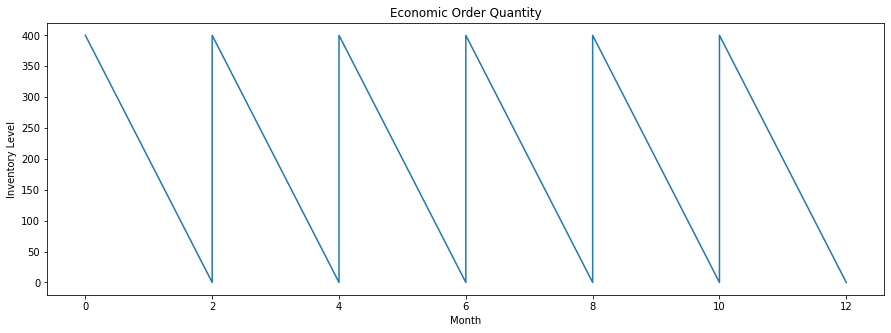

In [9]:
### ECONOMIC ORDER QUANTITY ###

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define EOQ function
def EOQ(S, D, H):
    
    """
    Economic Order Quantity
    
    Arguments:
    S: ordering cost
    D: annual quantity demanded
    H: holding cost per unit
    
    Returns:
    [Q, number_of_orders, time_between_cycles, annual ordering cost, annual holding cost, annual total cost]
    
    """
    
    # Validate that all function arguments are non-negative
    if(S>0 and D>0 and H>0):
        
        Q = (np.sqrt(2*S*D/H))
        number_of_orders = D/Q
        time_between_cycles = 12/number_of_orders
        AOC = D/Q*S
        AHC = Q/2*H
        ATC = AOC+AHC

        return [Q, number_of_orders, time_between_cycles, AOC, AHC, ATC]
    
    else:    
        print("Error. All function arguments must be non-negative.")
    
# Run example    
EOQ(10,24000,0.3)

# Create period list and append values
period = [0, 2]
while period[-1] < 12:
    period.append(period[-1])
    period.append(period[-1]+2)
    
# Create inventory list and append values
inventory = [400, 0]
while len(inventory) < len(period):
    inventory.append(400)
    inventory.append(0)

# Plot inventory level graph
plt.close('all')
plt.figure(figsize=(15,5))
plt.plot(period,inventory)
plt.xlabel("Month")
plt.ylabel("Inventory Level")
plt.title("Economic Order Quantity")

In [18]:
N = 10
Lo = 800 
D = norm(100,5)     # initiate demand rate distribution 
Ls =np.zeros((N+1,M))  # initiate matrix for inventory levels
ns = np.arange(N+1)
for m in range(M):
    Ls[:,m] =  np.r_[Lo, Lo-D.rvs(N).cumsum()]
print(Ls)

[[ 8.00000000e+02  8.00000000e+02  8.00000000e+02  8.00000000e+02
   8.00000000e+02  8.00000000e+02  8.00000000e+02  8.00000000e+02
   8.00000000e+02  8.00000000e+02  8.00000000e+02  8.00000000e+02]
 [ 7.05890632e+02  7.06645692e+02  6.99311130e+02  6.94337718e+02
   7.01597607e+02  6.98132537e+02  6.93368622e+02  6.98014941e+02
   7.05622824e+02  6.98788414e+02  6.97456899e+02  6.94038574e+02]
 [ 6.02280658e+02  6.12344783e+02  5.98378337e+02  5.85431991e+02
   6.03092357e+02  6.02662559e+02  5.92380544e+02  5.94638700e+02
   6.01869888e+02  5.99135858e+02  5.97055127e+02  5.98589295e+02]
 [ 5.07366204e+02  5.18586676e+02  4.94079933e+02  4.89575043e+02
   5.01184223e+02  5.08631751e+02  4.99978197e+02  4.87259593e+02
   4.99711817e+02  5.00308034e+02  5.04410564e+02  4.98456652e+02]
 [ 4.02930019e+02  4.13710206e+02  3.89395870e+02  3.83552555e+02
   3.92734188e+02  4.09231568e+02  3.99966539e+02  3.98667903e+02
   3.99563925e+02  3.94854129e+02  4.05011027e+02  4.00104316e+02]
 [ 3.

### What I am thinking:
- drowsing to sleep
- i don't know how to do this
- idk how to have more energy
- that is bs
- why cant i do this
- what is it, what is this
- pls do it
- I DONT KNOW HOW like SHIT seriously. I DONT KNOW HOW TO DO THIS.
- Ok, now what
- 
### What am I trying to do :
- Create an EOQ simulation : too vague.
- Whats the plan of execution? 
- In one inventory cycle - Initial inventory starts at lets say 1000,
- Whats an inventory cycle - lets say its a for loop for 15 days
- So in 15 days - we have MC simulation of iL decay towards 0.
- Meaning 30 times we calculate iL over the course of 15 days.
- Each day - there is a random demand
- This is then used to subtract from the iL
- At the end of it we have 15 rows and 30 column matrix.
- If the subtracting leads to iL < 0, then we have to reorder - Q units 
- We cant place the order when iL is at 0 because there is a delay in delivery of 2 days.
- I need to know 2 days before iL becomes 0
- How do I do that?

In [24]:
iL = 1000
iC = 15
nSim = 30
Ls = np.zeros((nSim+1,iC))
for sim in range(1,nSim+1):
    for eachDay in range(1,iC+1):
        dR = norm(100,5)
        Ls[:,sim] = np.r_[iL, iL - dR.rvs(iC).cumsum()]
print(Ls)
        
    
    
    

ValueError: could not broadcast input array from shape (16,) into shape (31,)

In [71]:
D = norm(200,2) #Demand (units)
S = 100 #Ordering cost ($)
H = 10 #Holding cost ($)
Q = math.sqrt((2*d*S)/H) #Optimal order quantity (units) Is 489
n = 4 #Number of products using the same assembly line (integer)
L = 10 #Lead time (days)
M = 12 #Number of cycles per year (monthly once - review period)
iL = 1000 #Initial inventory level
sS = 25
projections = np.zeros((10,M))
ns = np.arange(9+1)
inventory = []

In [76]:
for cycle in range(M):
    for timestep in range(10):
        if iL <= sS:
            print("WARNING : We've hit safety stock, an order of Q will be placed!")
        iL += Q
    
        
        


In [74]:
Q

489.89794855663564

In [69]:
inventory

[array([1000.        ,  800.08284093,  596.27349739,  395.61279182,
         195.54171657,   -8.08958199]),
 array([1000.        ,  798.3507288 ,  595.05155046,  395.90830299,
         196.20438304,   -6.09706205]),
 array([1000.        ,  802.6985622 ,  601.83335404,  403.07856794,
         203.01836945,    4.05439705]),
 array([1000.        ,  800.69975075,  602.60318689,  403.2029494 ,
         201.37666518,   -2.0763581 ]),
 array([1000.        ,  802.18379582,  600.90918299,  401.35291625,
         197.26418209,   -3.15534223]),
 array([1000.        ,  797.83932496,  593.93471504,  392.65858472,
         193.09334807,   -5.1690473 ]),
 array([1000.        ,  800.08156164,  599.35276895,  401.08305839,
         205.56634109,    3.80545744]),
 array([ 1.00000000e+03,  8.00629979e+02,  5.98767243e+02,  3.98683267e+02,
         1.99429741e+02, -4.36495917e-01]),
 array([1000.        ,  800.40125379,  598.96557644,  397.88337874,
         196.69375712,   -2.47954943]),
 array([1000.   

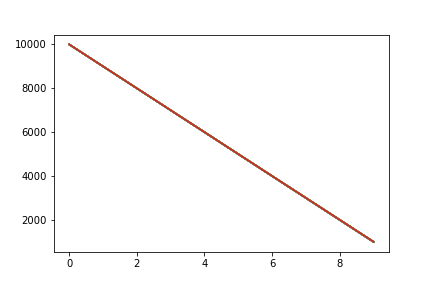

In [58]:
plt.close('all')
plt.plot(ns,projections)
plt.show()

In [77]:
D = 12000 #Annual demand
S = 100 #Ordering cost
H = 10 #Holding cost
Q = math.sqrt((2 * D * S)/H) #Optimal order quantity to be placed
nOrders = int(D/Q)
annualS = nOrders * S
annualH = (Q/2) * H
annualT = annualS + annualH